## Autoencoder to sample the household size distribution

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim 
from torchvision import datasets, transforms

In [19]:
data = pd.read_csv('A0_CORESIDENCE_NATIONAL_DATASET.csv')

In [20]:
data

,C0,C1,C2,C3,C4,T1,T2,T3,T5,T10,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,DB
0,AF,AFG,Afghanistan,ASIA,Southern Asia,2015,2010,1,2011,2010,...,2101.589319,0.364833,7.791942,1.272154,681.131699,0.542189,12.448320,3.015346,3489.646939,NATIONAL
1,AO,AGO,Angola,AFRICA,Middle Africa,2015,2010,1,2011,2010,...,7652.656486,0.549279,10.690100,3.657993,6626.812049,0.614968,12.704500,5.922784,8705.839878,NATIONAL
2,AL,ALB,Albania,EUROPE,Southern Europe,2008,2010,0,2006,2000,...,9962.442236,0.715264,12.348200,8.771930,7208.741202,0.753432,11.906640,9.836990,12720.559540,NATIONAL
3,AL,ALB,Albania,EUROPE,Southern Europe,2017,2020,1,2016,2010,...,12802.148310,0.797816,15.511230,11.122311,10148.612870,0.805385,14.179940,10.721275,15442.824030,NATIONAL
4,AR,ARG,Argentina,LATIN-AMERICA,South America,1970,1970,0,1966,1960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NATIONAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,ZW,ZWE,Zimbabwe,AFRICA,Eastern Africa,1999,2000,0,1996,1990,...,2664.181190,0.432812,9.890740,5.541591,2095.277838,0.481973,10.625300,7.324286,3291.783286,NATIONAL
788,ZW,ZWE,Zimbabwe,AFRICA,Eastern Africa,2005,2000,0,2001,2000,...,1973.994783,0.418780,9.963972,6.446619,1617.772438,0.476860,10.555666,7.934024,2371.978568,NATIONAL
789,ZW,ZWE,Zimbabwe,AFRICA,Eastern Africa,2010,2010,0,2006,2000,...,2817.502775,0.491970,10.850378,7.203784,2408.357616,0.531513,11.383433,8.174664,3278.955279,NATIONAL
790,ZW,ZWE,Zimbabwe,AFRICA,Eastern Africa,2012,2010,0,2011,2010,...,3618.629526,0.540584,11.204940,7.506650,3110.232219,0.571984,11.714540,8.270920,4193.823396,NATIONAL


In [21]:
data.columns

Index(['C0', 'C1', 'C2', 'C3', 'C4', 'T1', 'T2', 'T3', 'T5', 'T10',
       ...
       'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'DB'],
      dtype='object', length=179)

In [22]:
needed_columns = [f'HS0{i}' for i in range(1, 10)] + ['HS10', 'HS11']

In [23]:
dict_distr = {}
for i in range(len(data)):
    dict_distr[data['C2'][i]] = [data[column][i] for column in needed_columns]

In [24]:
sum(dict_distr['Zimbabwe'])

1.0

In [25]:
for name in dict_distr.keys():
    dict_distr[name] = [dict_distr[name][i] for i in range(6)] + [sum(dict_distr[name][6:])]

In [26]:
for name in dict_distr.keys():
    print(name, end='  ')

Afghanistan  Angola  Albania  Argentina  Armenia  Australia  Austria  Azerbaijan  Burundi  Belgium  Benin  Burkina Faso  Bangladesh  Bulgaria  Bosnia and Herzegovina  Belarus  Belize  Bolivia  Brazil  Bhutan  Botswana  Central African Republic  Canada  Switzerland  Chile  China  Cote d'Ivoire  Cameroon  Congo Democratic Republic  Congo  Colombia  Comoros  Costa Rica  Cuba  Cyprus  Czech Republic  Germany  Denmark  Dominican Republic  Algeria  Ecuador  Egypt  Spain  Estonia  Ethiopia  Finland  Fiji  France  Gabon  United Kingdom  Georgia  Ghana  Guinea  Gambia  Guinea-Bissau  Greece  Guatemala  Guyana  Honduras  Croatia  Haiti  Hungary  Indonesia  India  Ireland  Iran  Iraq  Israel  Italy  Jamaica  Jordan  Kazakhstan  Kenya  Kyrgyz Republic  Cambodia  South Korea  Laos  Liberia  Saint Lucia  Lesotho  Lithuania  Luxembourg  Latvia  Morocco  Moldova  Madagascar  Maldives  Mexico  Macedonia  Mali  Myanmar  Montenegro  Mongolia  Mozambique  Mauritania  Mauritius  Malawi  Malaysia  Namibia  

In [27]:
african_countries = [
    "Angola",
    "Burundi",
    "Benin",
    "Burkina Faso",
    "Central African Republic",
    "Cote d'Ivoire",
    "Cameroon",
    "Congo Democratic Republic",
    "Congo",
    "Comoros",
    "Algeria",
    "Egypt",
    "Ethiopia",
    "Gabon",
    "Ghana",
    "Guinea",
    "Gambia",
    "Guinea-Bissau",
    "Kenya",
    "Liberia",
    "Lesotho",
    "Morocco",
    "Madagascar",
    "Mali",
    "Mozambique",
    "Mauritania",
    "Mauritius",
    "Malawi",
    "Namibia",
    "Niger",
    "Nigeria",
    "Rwanda",
    "Sudan",
    "Senegal",
    "Sierra Leone",
    "Somalia",
    "South Sudan",
    "Sao Tome and Principe",
    "Eswatini",
    "Chad",
    "Togo",
    "Tunisia",
    "Tanzania",
    "Uganda",
    "South Africa",
    "Zambia",
    "Zimbabwe"
]

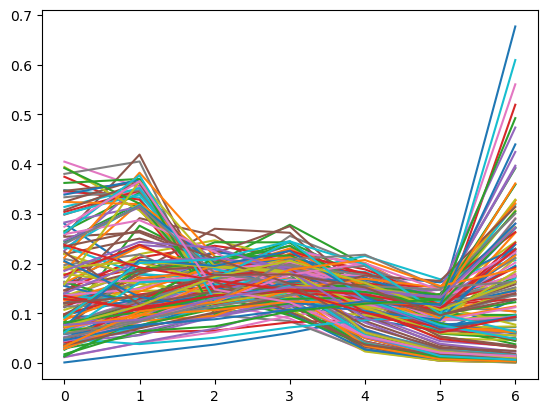

In [28]:
for name in dict_distr.keys():
    plt.plot(dict_distr[name])

In [29]:
transform = transforms.ToTensor()
learn_dict = {key: transform(np.array(dict_distr[key]).reshape(1, 7)) for key in dict_distr.keys()}

### Structure of an ancoder for the reconstruction of household size distribution and example of its training

In [30]:
class Autoencoder1(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(1 * 7, 1 * 1)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(1 * 1, 1 * 7),
            nn.ReLU()
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, y):
        return nn.functional.normalize(input=self.decoder(y)[0], p=1)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = nn.functional.normalize(input=self.decoder(encoded)[0], p=1)
        return decoded

In [31]:
model = Autoencoder1()
model.double()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [33]:
names = [name for name in learn_dict.keys()]

In [34]:
num_epochs = 200
outputs = []
for epoch in range(num_epochs):
    loss_arr = []
    for name in names[:145]:
        img = learn_dict[name]
        recon = model(img)
        loss = criterion(recon, img)
        loss_arr.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_avg = np.mean(loss_arr)

    loss_arr = []
    for name in names[145:]:
        img = learn_dict[name]
        recon = model(img)
        loss = criterion(recon, img)
        loss_arr.append(loss.item())
    loss_test = np.mean(loss_arr)

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append([epoch, img, recon, loss_avg, loss_test])

/home/tsurkis_vi/miniconda3/envs/snakemake/lib/python3.11/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1, 7])) that is different to the input size (torch.Size([1, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:1, Loss:0.0482
Epoch:2, Loss:0.0482
Epoch:3, Loss:0.0482
Epoch:4, Loss:0.0482
Epoch:5, Loss:0.0482
Epoch:6, Loss:0.0375
Epoch:7, Loss:0.0258
Epoch:8, Loss:0.0257
Epoch:9, Loss:0.0257
Epoch:10, Loss:0.0257
Epoch:11, Loss:0.0257
Epoch:12, Loss:0.0257
Epoch:13, Loss:0.0257
Epoch:14, Loss:0.0119
Epoch:15, Loss:0.0118
Epoch:16, Loss:0.0119
Epoch:17, Loss:0.0119
Epoch:18, Loss:0.0119
Epoch:19, Loss:0.0119
Epoch:20, Loss:0.0119
Epoch:21, Loss:0.0119
Epoch:22, Loss:0.0119
Epoch:23, Loss:0.0119
Epoch:24, Loss:0.0119
Epoch:25, Loss:0.0119
Epoch:26, Loss:0.0052
Epoch:27, Loss:0.0052
Epoch:28, Loss:0.0052
Epoch:29, Loss:0.0052
Epoch:30, Loss:0.0052
Epoch:31, Loss:0.0052
Epoch:32, Loss:0.0052
Epoch:33, Loss:0.0052
Epoch:34, Loss:0.0052
Epoch:35, Loss:0.0052
Epoch:36, Loss:0.0052
Epoch:37, Loss:0.0052
Epoch:38, Loss:0.0052
Epoch:39, Loss:0.0052
Epoch:40, Loss:0.0029
Epoch:41, Loss:0.0029
Epoch:42, Loss:0.0029
Epoch:43, Loss:0.0005
Epoch:44, Loss:0.0004
Epoch:45, Loss:0.0004
Epoch:46, Loss:0.00

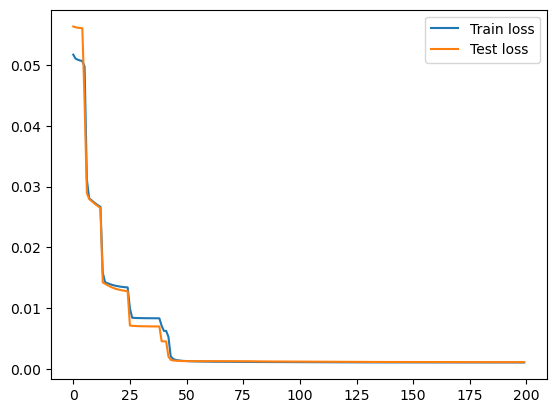

In [44]:
plt.plot([element[3] for element in outputs], label='Train loss')
plt.plot([element[4] for element in outputs], label='Test loss')
plt.legend()
plt.show()

### Inferring percentiles for the sampling

In [53]:
model = Autoencoder1()
model.load_state_dict(torch.load('models/model_for_hh_1D_L2_23_09.txt', weights_only=True))
model.double()

Autoencoder1(
  (encoder): Sequential(
    (0): Linear(in_features=7, out_features=1, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1, out_features=7, bias=True)
    (1): ReLU()
  )
)

In [54]:
arr_afr = [model.encode(learn_dict[name]).detach().numpy()[0][0][0]for name in african_countries]

In [55]:
arr_nonafr = [model.encode(learn_dict[name]).detach().numpy()[0][0][0] for name in dict_distr.keys() if name not in african_countries]

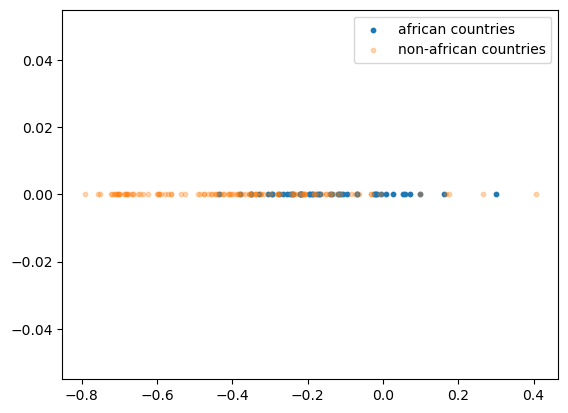

In [56]:
plt.scatter(arr_afr, [0 for element in arr_afr], label='african countries', s=10)
plt.scatter(arr_nonafr, [0 for element in arr_nonafr], label='non-african countries', alpha=0.3, s=10)
plt.legend()
plt.show()

In [57]:
arr_all = [model.encode(learn_dict[name]).detach().numpy()[0][0][0] for name in dict_distr.keys()]

In [58]:
np.percentile(arr_nonafr, [5, 95])

array([-0.71297123, -0.01707172])

### Examples of initial-rebuilt pairs

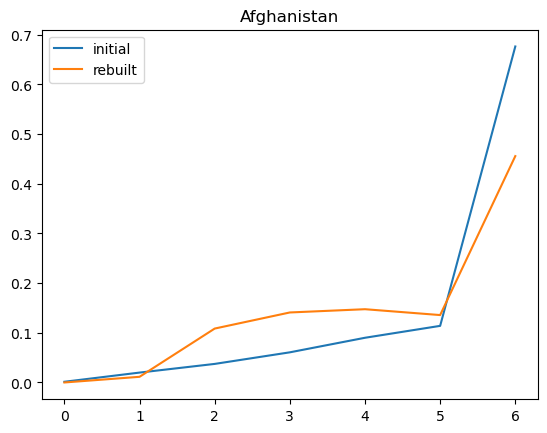

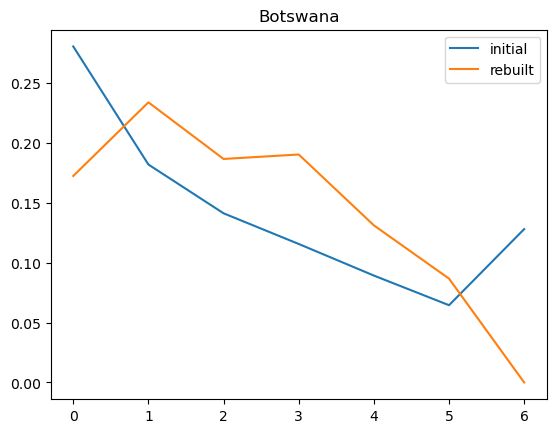

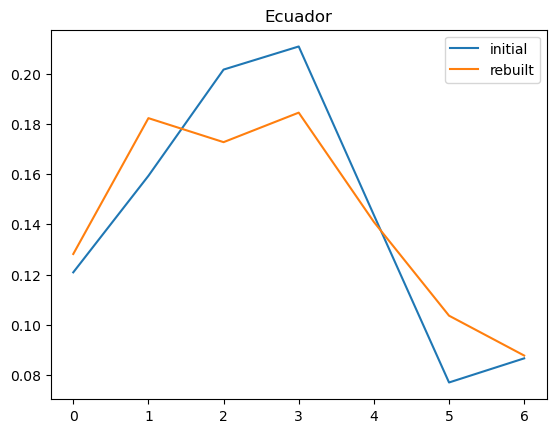

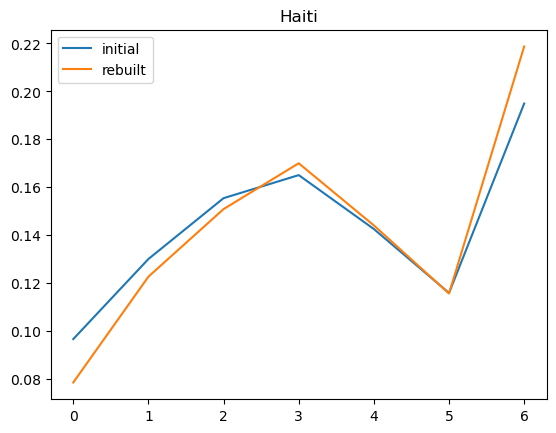

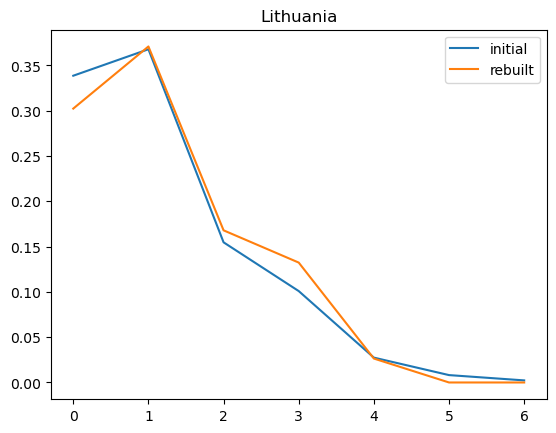

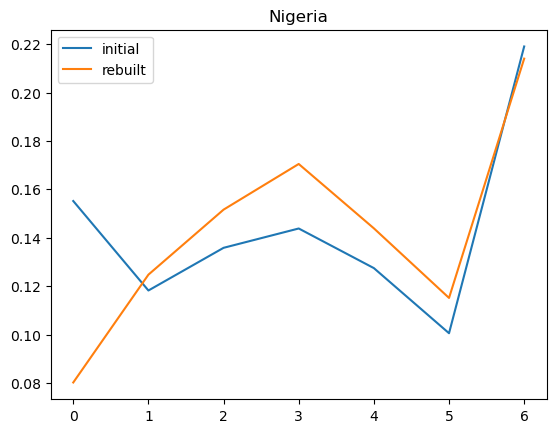

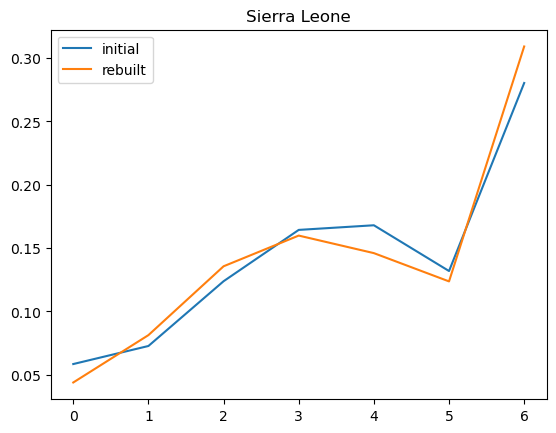

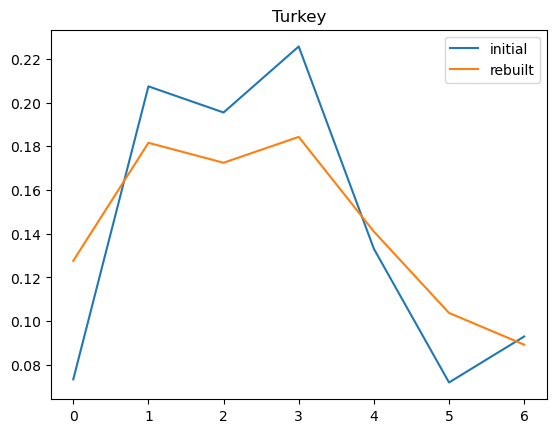

In [59]:
for name in names[::20]:
        img = learn_dict[name]
        recon = model(img)
        plt.plot(img.detach().numpy()[0][0], label='initial')
        plt.plot(recon.detach().numpy()[0], label='rebuilt')
        plt.title(name)
        plt.legend()
        plt.show()